In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pint
from pint import UnitRegistry
degree_sign= u'\N{DEGREE SIGN}'

In [2]:
pip install pint


     |████████████████████████████████| 204 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
from BlendCorrelations import BlendCorrelations

## Read in neat properties and blend volume fractions

In [12]:
# read in neat properties csv file
df_neat = pd.read_csv("data/neat_properties.csv", header = 0, dtype=object, index_col="name")

# remove sources and id
df_neat_props = df_neat.loc[:,~df_neat.columns.str.startswith('source')]
df_neat_props = df_neat_props.loc[:,~df_neat_props.columns.str.startswith('id')]
df_neat_props = df_neat_props.apply(pd.to_numeric, errors='coerce')

#df_neat_props

In [13]:
# blends dataframe
df_blend = pd.read_csv(f"data/blend_composition.csv", header = 0, dtype=object, index_col=0)
df_blend_comp = df_blend.loc[:, ~df_blend.columns.str.contains('id')] #remove id col like filename
df_blend_comp = df_blend_comp.apply(pd.to_numeric, errors='coerce')/100
df_blend_comp

,n-heptane,isooctane,methylcyclohexane,toluene,1-hexene,ethanol,diisobutylene,xylenes,farnesane,pmenthane,pinane,RJ4,F24
name,,,,,,,,,,,,,
farnesane_10_F24_90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.00,0.90
farnesane_20_F24_80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.00,0.80
farnesane_30_F24_70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.00,0.70
pinane_10_F24_90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.00,0.90
pinane_20_F24_80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJ4_10_F24_90_interp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.90
RJ4_15_F24_85_interp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.85
RJ4_20_F24_80_interp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.80


## Calculate blend properties

In [14]:
blend_components = df_blend_comp.columns.tolist()
blend_names = df_blend_comp.index.tolist()
blend_comp_dict = df_blend_comp.to_dict('index')

In [15]:
blend = BlendCorrelations(df_neat)
blend_calc_prop_dict = {}

for name in blend_names:
    
    comp = blend_comp_dict[str(name)]
    
    blend_calc_prop_dict[str(name)] = {}    
    blend_calc_prop_dict[str(name)]["fp_c"] = blend.flash_point(comp).magnitude
    blend_calc_prop_dict[str(name)]["mp_c"] = blend.freezing_point(comp).magnitude
    blend_calc_prop_dict[str(name)]["cn"] = blend.CN(comp)
    blend_calc_prop_dict[str(name)]["MW"] = blend.avg_MW(comp).magnitude
    blend_calc_prop_dict[str(name)]["H/C"] = blend.HC_ratio(comp).magnitude
    blend_calc_prop_dict[str(name)]["id_class"] = blend.molecule_classes(comp)
    blend_calc_prop_dict[str(name)]["id_n_C"] = blend.n_C_avg(comp).magnitude

In [16]:
df_blend_props = pd.DataFrame.from_dict(blend_calc_prop_dict, orient="index")
df_blend_props

,fp_c,mp_c,cn,MW,H/C,id_class,id_n_C
farnesane_10_F24_90,48.106680,-48.188726,49.23,171.083063,1.959639,paraffin jetfuel,12.122516
farnesane_20_F24_80,49.688790,-49.196841,50.16,174.742876,1.975021,paraffin jetfuel,12.377339
farnesane_30_F24_70,51.493610,-50.275704,51.09,178.593243,1.991204,paraffin jetfuel,12.645430
pinane_10_F24_90,45.840970,-47.814306,45.77,163.921103,1.926825,naphthene jetfuel,11.644350
pinane_20_F24_80,45.037190,-48.408037,43.24,160.443740,1.909645,naphthene jetfuel,11.421609
...,...,...,...,...,...,...,...
RJ4_10_F24_90_interp,47.859782,-47.242648,45.82,167.302491,1.913151,naphthene jetfuel,11.893731
RJ4_15_F24_85_interp,48.482116,-47.242648,44.58,167.157285,1.897607,naphthene jetfuel,11.900433
RJ4_20_F24_80_interp,49.136442,-47.242648,43.34,167.014370,1.882308,naphthene jetfuel,11.907029
RJ4_25_F24_75_interp,49.826065,-47.242648,42.10,166.873692,1.867248,naphthene jetfuel,11.913522


## Combine neat properties and ID with blend properties and ID

In [17]:
# combine blend ID columns with blend properties
df_blend_id_props = df_blend_props.join(df_blend) #.loc[:, df_blend.columns.str.contains('id')]
df_blend_id_props.index.name = 'name'
df_blend_id_props

,fp_c,mp_c,cn,MW,H/C,id_class,id_n_C,id_spectra_filename,id_n_components,id_spectra_source,...,toluene,1-hexene,ethanol,diisobutylene,xylenes,farnesane,pmenthane,pinane,RJ4,F24
name,,,,,,,,,,,,,,,,,,,,,
farnesane_10_F24_90,48.106680,-48.188726,49.23,171.083063,1.959639,paraffin jetfuel,12.122516,farnesane05_jeta45_1_110920.csv,2,exp,...,0,0,0,0,0,10,0,0,0,90
farnesane_20_F24_80,49.688790,-49.196841,50.16,174.742876,1.975021,paraffin jetfuel,12.377339,farnesane10_jeta40_1_110920.csv,2,exp,...,0,0,0,0,0,20,0,0,0,80
farnesane_30_F24_70,51.493610,-50.275704,51.09,178.593243,1.991204,paraffin jetfuel,12.645430,farnesane15_jeta35_1_110920.csv,2,exp,...,0,0,0,0,0,30,0,0,0,70
pinane_10_F24_90,45.840970,-47.814306,45.77,163.921103,1.926825,naphthene jetfuel,11.644350,pinane05_jeta45_1_111820.csv,2,exp,...,0,0,0,0,0,0,0,10,0,90
pinane_20_F24_80,45.037190,-48.408037,43.24,160.443740,1.909645,naphthene jetfuel,11.421609,pinane10_jeta40_1_111820.csv,2,exp,...,0,0,0,0,0,0,0,20,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJ4_10_F24_90_interp,47.859782,-47.242648,45.82,167.302491,1.913151,naphthene jetfuel,11.893731,../interpolated_spectra/RJ4_10_F24_90_interp_p...,2,interpolated polyfit degree 2,...,0,0,0,0,0,0,0,0,10,90
RJ4_15_F24_85_interp,48.482116,-47.242648,44.58,167.157285,1.897607,naphthene jetfuel,11.900433,../interpolated_spectra/RJ4_15_F24_85_interp_p...,2,interpolated polyfit degree 2,...,0,0,0,0,0,0,0,0,15,85
RJ4_20_F24_80_interp,49.136442,-47.242648,43.34,167.014370,1.882308,naphthene jetfuel,11.907029,../interpolated_spectra/RJ4_20_F24_80_interp_p...,2,interpolated polyfit degree 2,...,0,0,0,0,0,0,0,0,20,80


In [18]:
# merge neat and blend property and ID data
df_props_id = pd.concat([df_neat, df_blend_id_props], axis=0)
df_props_id

,id_spectra_filename,cn,fp_c,mp_c,bp_c,ysi,H/C,density_20C,viscosity_mm2s_20C,refractive_index_20C,...,toluene,1-hexene,ethanol,diisobutylene,xylenes,farnesane,pmenthane,pinane,RJ4,F24
name,,,,,,,,,,,,,,,,,,,,,
1-hexene,1-hexene_absorbance.CSV,26.4,-26.1,-139.9,63.4,42.4,2,0.673,NaN,1.3837,...,0,100,0,0,0,0,0,0,0,0
1-methylnaphthalene,1-methylnaphthalene_absorbance.CSV,0,82.1,-22,244.6,471.2,1.1,1.02,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1-pentene,1-pentene_absorbance.CSV,20,-51.2,NaN,29.9,NaN,2,0.6405,0.202,1.3715,...,0,0,0,0,0,0,0,0,0,0
"1,2,3-trimethylbenzene","1,2,3-trimethylbenzene_absorbance.CSV",10.1,45.9,-25.2,174.2,315.1,1.33333333333333,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
"1,2,3,4-tetrahydronaphthalene","1,2,3,4-tetrahydronaphthalene_absorbance.CSV",13,122.9,-35.9,207.6,264.4,1.2,0.9702,NaN,1.54135,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJ4_10_F24_90_interp,../interpolated_spectra/RJ4_10_F24_90_interp_p...,45.82,47.859782,-47.242648,NaN,NaN,1.913151,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,10,90
RJ4_15_F24_85_interp,../interpolated_spectra/RJ4_15_F24_85_interp_p...,44.58,48.482116,-47.242648,NaN,NaN,1.897607,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,15,85
RJ4_20_F24_80_interp,../interpolated_spectra/RJ4_20_F24_80_interp_p...,43.34,49.136442,-47.242648,NaN,NaN,1.882308,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,20,80


In [10]:
df_props_id.to_csv("data/df_props_id.csv", index_label="name")

## Make dataframe of spectra data at increment wavenumbers (cm^-1)

In [19]:
wv_numbers = np.arange(650, 4001, 1)
len(wv_numbers)

3351

In [20]:
fuel_names = df_props_id.index.tolist()
dict_spectra = {}

for fuel in fuel_names:
    filepath = os.path.join("data/spectra", df_props_id["id_spectra_filename"][fuel])

    df_single = pd.read_csv(filepath, header = None, names=["wv", "absorb"])
    wv = list(df_single["wv"])
    wv = [float(i) for i in wv]
    
    absorbances = list(df_single["absorb"])
    absorbances = [float(i) for i in absorbances]
    
    interp_abs = np.interp(wv_numbers, wv, absorbances)
    
    dict_spectra[str(fuel)] = interp_abs

In [21]:
df_spectra_absorbs = pd.DataFrame.from_dict(dict_spectra, orient='index', columns = wv_numbers)
df_spectra_absorbs.to_csv("data/df_spectra.csv", index_label="name")
df_spectra_absorbs

,650,651,652,653,654,655,656,657,658,659,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
1-hexene,0.012749,0.015859,0.016815,0.016901,0.012904,0.008298,0.008010,0.007622,0.005130,0.001569,...,-0.000760,-0.000232,-0.000568,-0.000535,-0.000547,-0.000572,-0.000213,0.000030,-0.000248,-0.000021
1-methylnaphthalene,0.102862,0.102485,0.103738,0.105825,0.101542,0.099294,0.099423,0.100536,0.098333,0.095423,...,0.034063,0.033854,0.033945,0.034741,0.035052,0.034480,0.033723,0.033784,0.034027,0.034403
1-pentene,0.022695,0.023084,0.021276,0.019938,0.015771,0.013890,0.011640,0.009973,0.009805,0.008241,...,0.006377,0.006437,0.006378,0.006870,0.007149,0.007057,0.007141,0.007369,0.007696,0.007548
"1,2,3-trimethylbenzene",0.026033,0.030989,0.030479,0.026449,0.027371,0.030089,0.030734,0.032817,0.031571,0.029096,...,0.001422,0.001354,0.001286,0.001010,0.001016,0.001123,0.001479,0.001744,0.001225,0.001165
"1,2,3,4-tetrahydronaphthalene",0.047039,0.048999,0.047987,0.046633,0.041024,0.039812,0.038673,0.037625,0.040786,0.040342,...,0.004781,0.004608,0.004466,0.005131,0.005191,0.004838,0.005164,0.005885,0.005673,0.005463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJ4_10_F24_90_interp,-0.002725,-0.002607,-0.002576,-0.002374,-0.002815,-0.002937,-0.002621,-0.002381,-0.002097,-0.001968,...,-0.001818,-0.001814,-0.001806,-0.001772,-0.001775,-0.001819,-0.001836,-0.001824,-0.001826,-0.001433
RJ4_15_F24_85_interp,-0.003467,-0.003400,-0.003207,-0.002854,-0.003350,-0.003328,-0.003091,-0.002877,-0.002412,-0.002292,...,-0.002186,-0.002196,-0.002203,-0.002163,-0.002142,-0.002174,-0.002195,-0.002186,-0.002192,-0.001714
RJ4_20_F24_80_interp,-0.004128,-0.004101,-0.003761,-0.003281,-0.003825,-0.003676,-0.003513,-0.003321,-0.002698,-0.002587,...,-0.002508,-0.002531,-0.002551,-0.002505,-0.002464,-0.002485,-0.002511,-0.002503,-0.002513,-0.001959
RJ4_25_F24_75_interp,-0.004707,-0.004709,-0.004239,-0.003655,-0.004239,-0.003982,-0.003887,-0.003713,-0.002953,-0.002853,...,-0.002785,-0.002819,-0.002850,-0.002800,-0.002741,-0.002752,-0.002782,-0.002776,-0.002788,-0.002170


In [22]:
df_props_id_spectra = df_props_id.join(df_spectra_absorbs)

In [14]:
df_props_id_spectra = df_props_id.join(df_spectra_absorbs)
df_props_id_spectra.to_csv("data/df_props_id_spectra.csv", index_label="name")

In [25]:
wavenumbers = list(df_spectra_absorbs.columns)
spectra_path = "plots/spectra_plots"

fuel_names = df_spectra_absorbs.index.values.tolist()
X = df_spectra_absorbs.values.astype(np.float64)
max_abs =  np.amax(X)
min_abs = np.amin(X)

for i, spectra in enumerate(X):

    plt.plot(wavenumbers, X[i])
    plt.xlabel("Wavenumber")
    plt.ylabel("Absorbance")
    plt.grid()
    
    plt.ylim(min_abs,  max_abs)
    plt.title(f"{fuel_names[i]}")
    name = fuel_names[i].replace("/","-")
    plt.savefig(f"{spectra_path}/{name}_spectra.png", bbox_inches='tight', dpi=800)
    plt.clf()

<Figure size 432x288 with 0 Axes>

## Save baseline corrected spectra

In [ ]:
def baseline_correction(df_spectra):
    # subtracts minimum absorbance in a spectraum from all of the absorbances in a spectrum
    # so the minimum absorbance from each spectra is zero.

    wavenumbers = list(df_spectra.columns)

    X = df_spectra.values.astype(np.float)
    index_list= list(df_spectra.index.values)
    corrected_spec = np.array(X)

    for idx, spectra in enumerate(X):

        min_abs = min(spectra)
        spectra_bc = spectra - min_abs

        corrected_spec[idx] = spectra_bc
        
        df_fuel = pd.DataFrame(spectra_bc, index=wavenumbers)
        df_fuel.to_csv(f"data/baseline_corrected_spectra/{index_list[idx]}_baseline_corrected.csv", header=None, index=True) 

    df_bc = pd.DataFrame(data = corrected_spec,
                        columns = wavenumbers, 
                        index = index_list)    

    return df_bc

In [ ]:
df_bc = baseline_correction(df_spectra_absorbs)
df_bc

In [31]:
df_bc.to_csv("data/df_spectra_baseline_corrected.csv", index_label="name")

KeyboardInterrupt: 

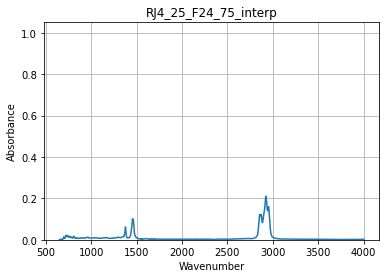

In [32]:
spectra_path = "plots/spectra_plots"

wavenumbers = list(df_bc.columns)
fuel_names = df_bc.index.values.tolist()
X = df_bc.values.astype(np.float)
max_abs =  np.amax(X)
min_abs = np.amin(X)

for i, spectra in enumerate(X):

    plt.plot(wavenumbers, X[i])
    plt.xlabel("Wavenumber")
    plt.ylabel("Absorbance")
    plt.grid()
    
    plt.ylim(min_abs,  max_abs)
    plt.title(f"{fuel_names[i]}")
    name = fuel_names[i].replace("/","-")
    plt.savefig(f"{spectra_path}/{name}_spectra_baseline_corrected.png", bbox_inches='tight', dpi=800)
    plt.clf()